## V16 Rutherford Streuversuch

In [1]:
%config InlineBackend.figure_formats = ['svg']

from IPython.display import display

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame as df 
import scipy.constants as const
from scipy.optimize import curve_fit as fit
from scipy.signal import find_peaks as peaks
import uncertainties.unumpy as unp
import uncertainties.umath as um
from uncertainties.unumpy import uarray as uar, nominal_values as noms, std_devs as stds
from uncertainties import ufloat as u

plt.rcParams['figure.figsize']=[8,5]
plt.rcParams['figure.constrained_layout.use']=True
plt.rcParams['legend.frameon']=False
plt.rcParams["xtick.minor.visible"]=True
plt.rcParams["ytick.minor.visible"]=True

#### Einfluss elektronischer Bauteile auf Impulse

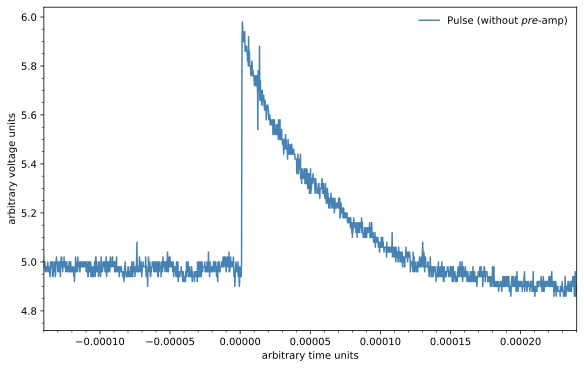

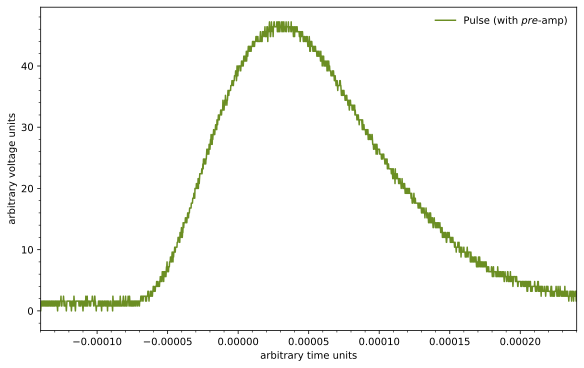

In [2]:
without_amp_x, without_amp_y = np.genfromtxt('data/altprotokoll/without_amp.txt', unpack=True)
with_amp_x, with_amp_y = np.genfromtxt('data/altprotokoll/with_amp.txt', unpack=True)

plt.plot(1e0 * without_amp_x, without_amp_y, c='steelblue', label='Pulse (without $pre$-amp)')

plt.xlabel('arbitrary time units')
plt.ylabel('arbitrary voltage units')

plt.xlim(-0.00014, 0.00024)

plt.legend()

plt.show()
plt.close()

plt.plot(1e2 * with_amp_x, with_amp_y, c='olivedrab', label='Pulse (with $pre$-amp)')

plt.xlabel('arbitrary time units')
plt.ylabel('arbitrary voltage units')

plt.xlim(-0.00014, 0.00024)

plt.legend()

plt.show()
plt.close()

#### Lineare Ausgleichsrechnung zur Bestimmung der Filmdicke

Ohne Folie:


$p \text{ / mbar}$,$U_\text{max} \text{ / V}$,$U_\text{min} \text{ / V}$
0.026000,5.000000,3.520000
20.200000,4.640000,3.440000
41.000000,4.400000,3.160000
60.200000,4.320000,2.720000
86.100000,4.000000,2.520000
101.000000,3.880000,2.400000
123.400000,3.640000,2.160000
141.700000,3.280000,1.800000
167.000000,2.920000,1.480000
178.500000,2.800000,1.440000



Mit Folie:


$p \text{ / mbar}$,$U_\text{max} \text{ / V}$,$U_\text{min} \text{ / V}$
0.026000,4.320000,2.120000
19.500000,3.880000,1.760000
39.000000,3.600000,1.720000
60.300000,3.320000,1.240000
79.500000,3.320000,0.880000
99.500000,2.600000,0.880000
123.400000,2.480000,0.880000
142.000000,2.160000,0.680000
162.600000,1.720000,0.680000
182.200000,1.720000,0.680000


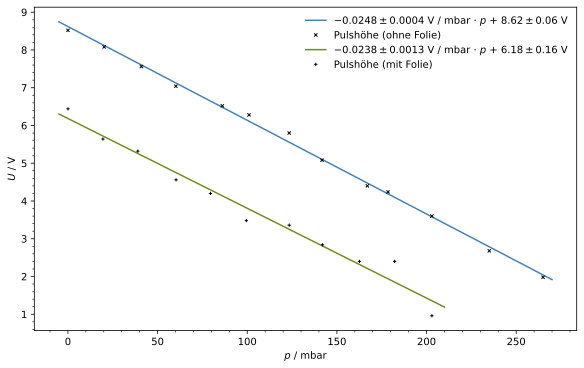

In [3]:
of_p, of_Umax, of_Umin = np.genfromtxt('data/altprotokoll/ohne_folie.txt', unpack=True)
mf_p, mf_Umax, mf_Umin = np.genfromtxt('data/altprotokoll/mit_folie.txt', unpack=True)

of_df = df({r'$p \text{ / mbar}$':of_p, r'$U_\text{max} \text{ / V}$':of_Umax, r'$U_\text{min} \text{ / V}$':of_Umin})
mf_df = df({r'$p \text{ / mbar}$':mf_p, r'$U_\text{max} \text{ / V}$':mf_Umax, r'$U_\text{min} \text{ / V}$':mf_Umin})

print('Ohne Folie:')
display(of_df.style.hide())
print('')
print('Mit Folie:')
display(mf_df.style.hide())

of_U = of_Umax + of_Umin
mf_U = mf_Umax + mf_Umin

of_par, of_cov = np.polyfit(of_p, of_U, deg=1, cov=True)
of_err = np.sqrt(np.diag(of_cov))
of_par = uar(of_par, of_err)

mf_par, mf_cov = np.polyfit(mf_p, mf_U, deg=1, cov=True)
mf_err = np.sqrt(np.diag(mf_cov))
mf_par = uar(mf_par, mf_err)

of = np.linspace(-5, 270, 1000)
mf = np.linspace(-5, 210, 1000)

def lin(x, a, b):
    return a * x + b

plt.plot(of, lin(of, *noms(of_par)), c='steelblue', label=f'${of_par[0]:L}$ V / mbar $\cdot$ $p$ $+$ ${of_par[1]:L}$ V')
plt.plot(of_p, of_U, 'kx', ms=3.21, label='Pulshöhe (ohne Folie)')

plt.plot(mf, lin(mf, *noms(mf_par)), c='olivedrab', label=f'${mf_par[0]:L}$ V / mbar $\cdot$ $p$ $+$ ${mf_par[1]:L}$ V')
plt.plot(mf_p, mf_U, 'k+', ms=3.21, label='Pulshöhe (mit Folie)')

plt.xlabel('$p$ / mbar')
plt.ylabel('$U$ / V')

plt.legend()

plt.show()
plt.close()

$$U = a \cdot p + b$$

In [4]:
Ea_eV = 5.486e6
I_eV = 790
ma_eV = 3727.3794066e6
dE_eV = Ea_eV * (1 - mf_par[1] / of_par[1])

Ea_J = Ea_eV * const.e
I_J = I_eV * const.e
ma_kg = 6.6446573357e-27
dE_J = Ea_J * (1 - mf_par[1] / of_par[1])

print(f'dE = {dE_eV} eV = {dE_J} J')

dE = (1.55+/-0.10)e+06 eV = (2.48+/-0.17)e-13 J


$$\Delta E_\alpha = E_\alpha \frac{b_\text{of} - b_\text{mf}}{b_\text{of}} = E_\alpha \left( 1 - \frac{b_\text{mf}}{b_\text{of}} \right)$$

In [5]:
N = 5.9e28
z = 2
Z = 79

m_e = const.m_e
eps_0 = const.epsilon_0
e = const.e

d = dE_J * 2 * m_e * Ea_J * 4 * np.pi * eps_0**2 / (ma_kg * e**4 * N * z*2 * Z * np.log(4 * m_e * Ea_J / (ma_kg * I_J)))

print(f'd = {d} m')

d = (3.59+/-0.24)e-06 m


$$d = \Delta x_\alpha = \Delta E_\alpha \frac{m_e v_\alpha^2 4\pi \varepsilon_0^2}{e^4 N z^2 Z \ln (2m_e v_\alpha^2 / I)}
= \Delta E_\alpha \frac{2 m_e E_\alpha 4\pi \varepsilon_0^2}{m_\alpha e^4 N z^2 Z \ln (4m_e E_\alpha / m_\alpha I)}$$